In [45]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
url = "https://codeforces.com/submissions/jiangly"

In [3]:
html = requests.get(url)
print(html)

<Response [200]>


In [4]:
soup = BeautifulSoup(html.text, "html.parser")

In [6]:
df = pd.read_html(html.content)[0]

In [7]:
df.head()

,#,When,Who,Problem,Lang,Verdict,Time,Memory
0,229268085,Oct/22/2023 15:33,jiangly,F - Minimum Segments,GNU C++20 (64),Accepted,62 ms,6900 KB
1,229253684,Oct/22/2023 15:10,jiangly,E - Good Colorings,GNU C++20 (64),Accepted,155 ms,500 KB
2,229252286,Oct/22/2023 15:08,jiangly,E - Good Colorings,GNU C++20 (64),Runtime error on pretest 1,15 ms,0 KB
3,229234655,Oct/22/2023 14:42,jiangly,D - Split,GNU C++20 (64),Accepted,763 ms,60600 KB
4,229225852,Oct/22/2023 14:30,jiangly,C - Minimum Array,GNU C++20 (64),Accepted,1216 ms,62200 KB


# Gen links from # and Problem column

In [13]:
td_elements = soup.find_all("td"
                     , class_="status-small"
                     )
href_list = [td.find('a')['href'] for td in td_elements if td.find('a')]
print(href_list[:10])

['/contest/1887/problem/F', '/contest/1887/problem/E', '/contest/1887/problem/E', '/contest/1887/problem/D', '/contest/1887/problem/C', '/contest/1887/problem/B', '/contest/1887/problem/A2', '/contest/1887/problem/A1', '/contest/1884/problem/E', '/contest/1884/problem/D']


In [ ]:
df['Problem links'] = href_list

In [14]:
td_elements = soup.find_all("td"
                     , class_="id-cell"
                     )
href_list = [td.find('a')['href'] for td in td_elements if td.find('a')]
print(href_list[:10])
df['# links'] = href_list

['/contest/1887/submission/229268085', '/contest/1887/submission/229253684', '/contest/1887/submission/229252286', '/contest/1887/submission/229234655', '/contest/1887/submission/229225852', '/contest/1887/submission/229219341', '/contest/1887/submission/229211901', '/contest/1887/submission/229207683', '/contest/1884/submission/229164513', '/contest/1884/submission/229156319']


In [15]:
df.head()

,#,When,Who,Problem,Lang,Verdict,Time,Memory,Problem links,# links
0,229268085,Oct/22/2023 15:33,jiangly,F - Minimum Segments,GNU C++20 (64),Accepted,62 ms,6900 KB,/contest/1887/problem/F,/contest/1887/submission/229268085
1,229253684,Oct/22/2023 15:10,jiangly,E - Good Colorings,GNU C++20 (64),Accepted,155 ms,500 KB,/contest/1887/problem/E,/contest/1887/submission/229253684
2,229252286,Oct/22/2023 15:08,jiangly,E - Good Colorings,GNU C++20 (64),Runtime error on pretest 1,15 ms,0 KB,/contest/1887/problem/E,/contest/1887/submission/229252286
3,229234655,Oct/22/2023 14:42,jiangly,D - Split,GNU C++20 (64),Accepted,763 ms,60600 KB,/contest/1887/problem/D,/contest/1887/submission/229234655
4,229225852,Oct/22/2023 14:30,jiangly,C - Minimum Array,GNU C++20 (64),Accepted,1216 ms,62200 KB,/contest/1887/problem/C,/contest/1887/submission/229225852


# 2. Write a function that receives the link to a codeforces problem as a parameter and returns the list of tags. Problem tags can be found by accessing the problem link and looking on the right side of the screen.

In [19]:
def problem_link_to_list_of_tags(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.text, "html.parser")
    tag_boxes = soup.find_all("span", class_="tag-box")
    tags = []
    for tag_box in tag_boxes:
        text = tag_box.get_text()
        text = text.replace("  ", "")
        text = text.replace("\r\n", "")
        tags.append(text)
    return tags

In [20]:
problem_link_to_list_of_tags("https://codeforces.com/contest/1887/problem/E")

['binary search', 'constructive algorithms', 'graphs', 'interactive']

# 3. Add a column to the dataset containing the problem tags for each row.

In [32]:
problems_tags = []
problem_number = df["Problem links"].size
for idx, url in enumerate(df["Problem links"]):
    print(f"Fetching information for {idx}/{problem_number}")
    full_url = "https://codeforces.com/" + url
    problem_tags = problem_link_to_list_of_tags(full_url)
    problems_tags.append(problem_tags)
    
print(problems_tags)

Fetching information for 0/50
Fetching information for 1/50
Fetching information for 2/50
Fetching information for 3/50
Fetching information for 4/50
Fetching information for 5/50
Fetching information for 6/50
Fetching information for 7/50
Fetching information for 8/50
Fetching information for 9/50
Fetching information for 10/50
Fetching information for 11/50
Fetching information for 12/50
Fetching information for 13/50
Fetching information for 14/50
Fetching information for 15/50
Fetching information for 16/50
Fetching information for 17/50
Fetching information for 18/50
Fetching information for 19/50
Fetching information for 20/50
Fetching information for 21/50
Fetching information for 22/50
Fetching information for 23/50
Fetching information for 24/50
Fetching information for 25/50
Fetching information for 26/50
Fetching information for 27/50
Fetching information for 28/50
Fetching information for 29/50
Fetching information for 30/50
Fetching information for 31/50
Fetching informati

# 4. Create a wordcloud based on the tags. This will let us know what kind of problems the user attempts most (or least).

In [39]:
text = ' '.join([' '.join(sublist) for sublist in problems_tags])

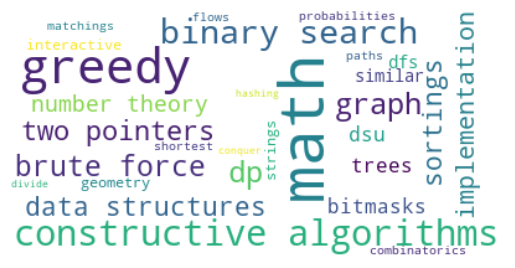

In [42]:
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white")

wordcloud_picture = wordcloud.generate(text)

plt.imshow(wordcloud_picture, interpolation="bilinear")
plt.axis("off")
plt.show()

# 5. Create a graphic for the "Verdict" column. It should reflect how many problems were accepted, how many failed on test 1 etc

In [43]:
df.head()

,#,When,Who,Problem,Lang,Verdict,Time,Memory,Problem links,# links
0,229268085,Oct/22/2023 15:33,jiangly,F - Minimum Segments,GNU C++20 (64),Accepted,62 ms,6900 KB,/contest/1887/problem/F,/contest/1887/submission/229268085
1,229253684,Oct/22/2023 15:10,jiangly,E - Good Colorings,GNU C++20 (64),Accepted,155 ms,500 KB,/contest/1887/problem/E,/contest/1887/submission/229253684
2,229252286,Oct/22/2023 15:08,jiangly,E - Good Colorings,GNU C++20 (64),Runtime error on pretest 1,15 ms,0 KB,/contest/1887/problem/E,/contest/1887/submission/229252286
3,229234655,Oct/22/2023 14:42,jiangly,D - Split,GNU C++20 (64),Accepted,763 ms,60600 KB,/contest/1887/problem/D,/contest/1887/submission/229234655
4,229225852,Oct/22/2023 14:30,jiangly,C - Minimum Array,GNU C++20 (64),Accepted,1216 ms,62200 KB,/contest/1887/problem/C,/contest/1887/submission/229225852


In [47]:
problems_verdict = Counter(df["Verdict"])
problems_verdict = dict(problems_verdict)
print(problems_verdict)

{'Accepted': 45, 'Runtime error on pretest 1': 1, 'Wrong answer on test 2': 2, 'Wrong answer on test 11': 1, 'Wrong answer on test 16': 1}


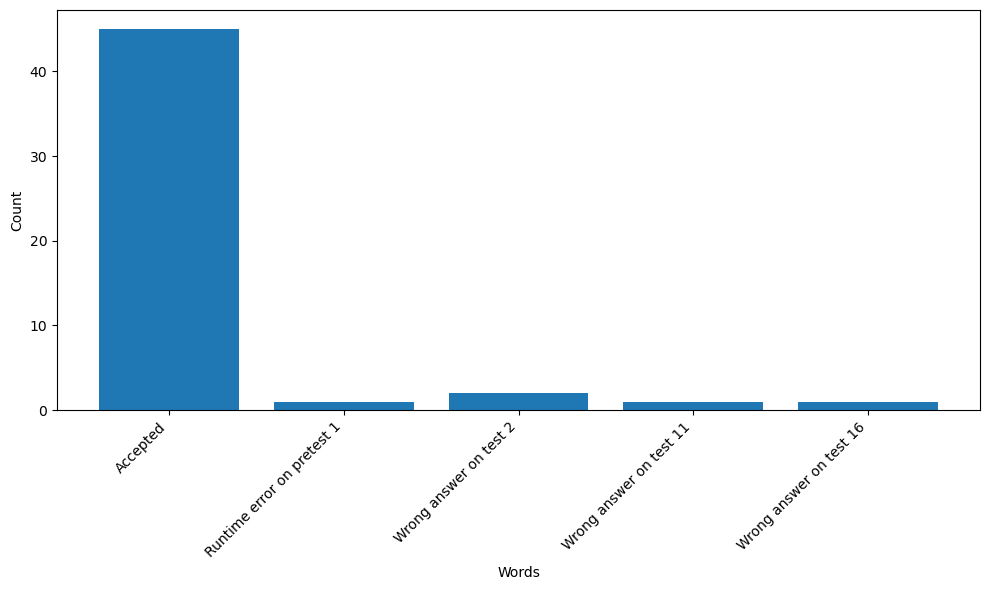

In [57]:
plt.figure(figsize=(10, 6))

plt.bar(problems_verdict.keys(), problems_verdict.values())
plt.xticks(rotation=45, ha='right')

plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 5. Save the dataframe as a local csv

In [58]:
df.to_csv("test.csv")